In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load dataset

In [6]:
census_income = pd.read_csv('./census-income.data', sep=',')

census_income.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,ignore
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
96,49,State government,29,26,11th grade,0,Not in universe,Married-civilian spouse present,Transportation,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
97,76,Private,43,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Education,Executive admin and managerial,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,26,94,- 50000.
98,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

### Weeks worked in year by martial status

In [52]:
subset_attributes = ['weeks worked in year']

never_married = round(census_income[(census_income['marital stat'] == ' Never married') & (census_income['age'] >= 15)][
                          subset_attributes].describe(), 2)
maried_civilian = round(
    census_income[(census_income['marital stat'] == ' Married-civilian spouse present') & (census_income['age'] >= 15)][
        subset_attributes].describe(), 2)
divorced = round(census_income[(census_income['marital stat'] == ' Divorced') & (census_income['age'] >= 15)][
                     subset_attributes].describe(), 2)
widowed = round(census_income[(census_income['marital stat'] == ' Widowed') & (census_income['age'] >= 15)][
                    subset_attributes].describe(), 2)
separated = round(census_income[(census_income['marital stat'] == ' Separated') & (census_income['age'] >= 15)][
                      subset_attributes].describe(), 2)
married_spouse = round(
    census_income[(census_income['marital stat'] == ' Married-spouse absent') & (census_income['age'] >= 15)][
        subset_attributes].describe(), 2)
married_A = round(
    census_income[(census_income['marital stat'] == ' Married-A F spouse present') & (census_income['age'] >= 15)][
        subset_attributes].describe(), 2)

pd.concat([never_married, maried_civilian, divorced, widowed, separated, married_spouse, married_A], axis=1,
          keys=['Never married', 'Married-civilian spouse present', 'Divorced', 'Widowed', 'Separated',
                'Married-spouse absent', 'Married-A F spouse present'])


,Never married,Married-civilian spouse present,Divorced,Widowed,Separated,Married-spouse absent,Married-A F spouse present
,weeks worked in year,weeks worked in year,weeks worked in year,weeks worked in year,weeks worked in year,weeks worked in year,weeks worked in year
count,39070.00,84215.00,12710.00,10463.00,3460.00,1518.00,665.00
mean,27.17,33.77,35.82,8.87,30.50,30.25,28.21
std,23.03,23.17,22.09,18.71,23.52,23.63,22.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,10.00,0.00,0.00,0.00,0.00
50%,28.00,52.00,52.00,0.00,45.00,44.50,32.00
75%,52.00,52.00,52.00,0.00,52.00,52.00,52.00
max,52.00,52.00,52.00,52.00,52.00,52.00,52.00


This table shows the different marital states with their *weeks worked in year*. I filtered out people that are younger than 15 years, because they will not be married yet and do not work yet. And children do count in the never married category.

This brings us to the result that *divorced* people worked the most in that year that the data was gathered. Directly followed by the *married civilian spouse present* with not much difference. Followed by *separated* and *Married-spouse absent* couples which are almost equal. This is followed by *married af spouse present*, where af means that the spouse is in the armed forces, but still present in the marriage. Afterwards is *never married*, which about the same as the predecessor. The fewest weeks worked in that year whereby widowed people, the difference is very great compared with *never married people*.

*Divorced*, *Separated*, *Married spouse absent* and *Married af spouse present* all have a minimum of 0, which could indicate that they work and look after the children after the marriage broke up. This could lower the mean very much. For *Widowed* the same logic could apply, or the widowed person takes a year of from working, because he/she has to take care for the dead person.

Throughout all marital states, the maximum is 52 weeks, which would mean, the people worked the complete year without a break.

### Wage per hour for education


In [48]:
subset_attributes = ['wage per hour']

hs = round(census_income[census_income['education'] == ' High school graduate'][subset_attributes].describe(), 2)
bsc = round(census_income[census_income['education'] == ' Bachelors degree(BA AB BS)'][subset_attributes].describe(), 2)
cnd = round(census_income[census_income['education'] == ' Some college but no degree'][subset_attributes].describe(), 2)
md = round(census_income[census_income['education'] == ' Masters degree(MA MS MEng MEd MSW MBA)'][
               subset_attributes].describe(), 2)
doc = round(census_income[census_income['education'] == ' Doctorate degree(PhD EdD)'][subset_attributes].describe(), 2)
pd.concat([hs, bsc, cnd, md, doc], axis=1,
          keys=['High School Grad', 'Bachelors degree(BA AB BS)', 'College without Degree', 'Masters Degree',
                'Doctorate degree'])

,High School Grad,Bachelors degree(BA AB BS),College without Degree,Masters Degree,Doctorate degree
,wage per hour,wage per hour,wage per hour,wage per hour,wage per hour
count,48407.00,19865.00,27820.00,6541.00,1263.00
mean,88.04,71.39,88.30,51.24,31.37
std,332.32,347.23,318.57,323.56,391.56
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00
max,9400.00,8500.00,8600.00,6500.00,9999.00


This table compares the wages per hour across different educations in the USA. Educations contain forms of higher education with high-school as the base. This graph shouws that the highest mean wage per hour is retrieved by *college without degree*, followed by *high school* graduates. Straight afterwards there are bachelor graduates followed by master graduates. The least wage mean per hour is received by doctorate degrees, but a doctors degree has the highest maximum wage per hour.

# Univariante Analyse

## Visualizing one dimension

### Census by gender

<BarContainer object of 2 artists>

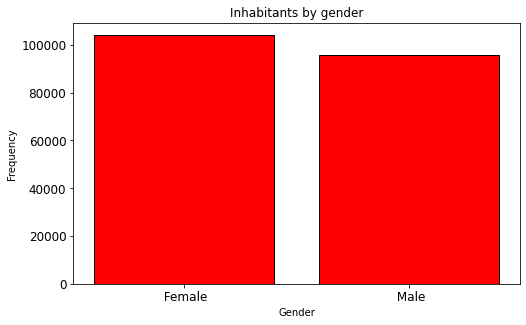

In [7]:
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Inhabitants by gender")
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')

empSex = census_income['sex'].value_counts()
empSex = (list(empSex.index), list(empSex.values))

ax.tick_params(axis='both', which='major', labelsize=12)
ax.bar(empSex[0], empSex[1], color='red', edgecolor='black', linewidth=1)

This bar-chart shows that more females than males inhabit the USA in the time this data was collected. Women make about 52% of the population, whereas males make only 48%.

### Education frequency

<BarContainer object of 17 artists>

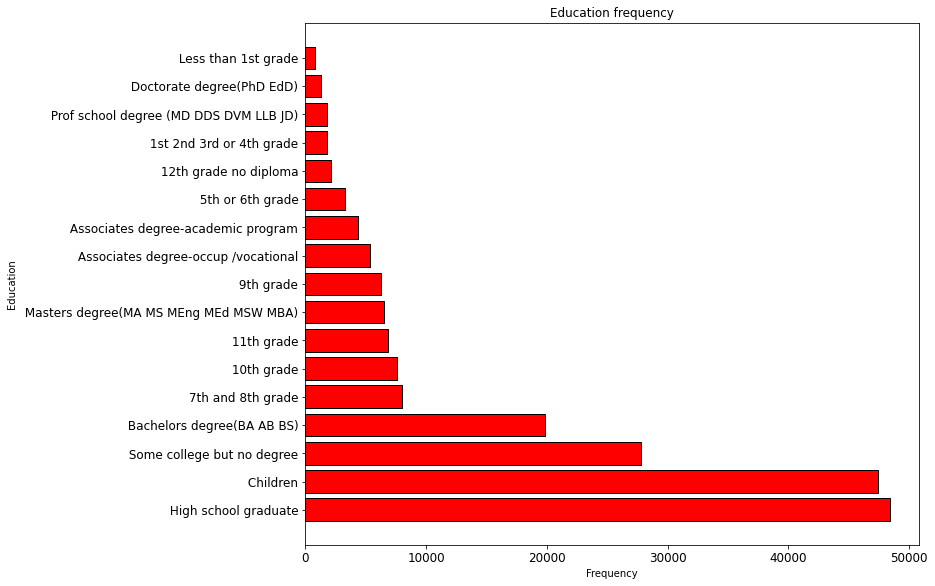

In [8]:
fig = plt.figure(figsize=(11, 10))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Education frequency")
ax.set_ylabel('Education')
ax.set_xlabel('Frequency')

inEducation = census_income['education'].value_counts()
inEducation = (list(inEducation.index), list(inEducation.values))

ax.tick_params(axis='both', which='major', labelsize=12)
ax.barh(inEducation[0], inEducation[1], color='red', edgecolor='black', linewidth=1)

This bar-chart shows that high-school is the most common education in the USA. The high-school in the USA is required, therefore this can be explained. Many people went to a college, but have no degree. Many people still have some kind of bachelor degree. After that the frequency of people that dropped school are shown, but they are very little in comparison to high school graduates. Many citizens still have some kind of master degree, whereas a doctorate degree is only achieved by a small portion of people. A very fraction is shown to have never completed the first grade of school.

### Race frequency

<BarContainer object of 5 artists>

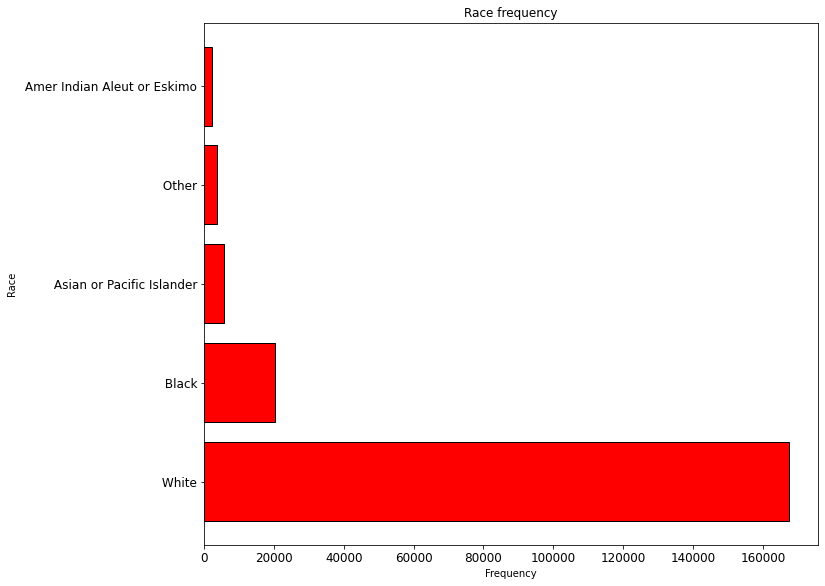

In [9]:
fig = plt.figure(figsize=(11, 10))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Race frequency")
ax.set_ylabel('Race')
ax.set_xlabel('Frequency')

race = census_income['race'].value_counts()
race = (list(race.index), list(race.values))

ax.tick_params(axis='both', which='major', labelsize=12)
ax.barh(race[0], race[1], color='red', edgecolor='black', linewidth=1)

This plot shows the race frequency in the USA. As we can see in the plot, that white people are by far the most common race in the USA in the year this data was gathered. After white, black people make only a small amount of the people in the USA. The following race are a very small fraction. The numbers are so small that some races were aggregated under the *Other*.

## Visualize two dimensions

### Correlation Heat Map


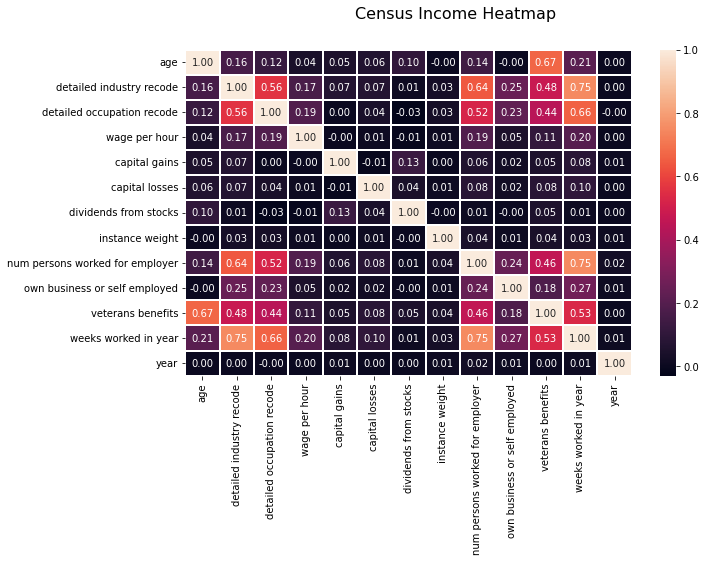

In [10]:
f, ax = plt.subplots(figsize=(10, 6))
corr = census_income.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, fmt='.2f', linewidths=.06)
t = f.suptitle('Census Income Heatmap', fontsize=16)

This heatmap shows that the shown attributes of the census-income do not have much correlation. Only some attributes seem to have a correlation to some extent. Attributes like *age* and *veteran benefits* seem to have a correlation. This is because older people served in wars, therefore they or their relatives might get a veteran benefit. Next correlation is the *num persons worked for employer* and the *weeks worked in one year*. This correlation is quite obvious as more people working translates to more weeks worked in one year.

### Sex by Race

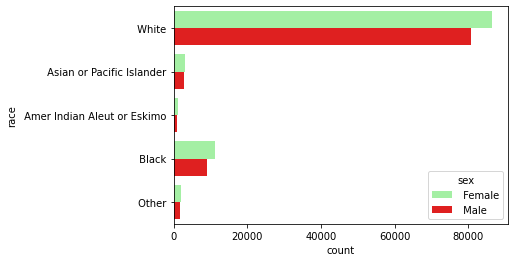

In [20]:
cp = sns.countplot(y="race", hue="sex", data=census_income,
                   palette={" Female": "palegreen", " Male": "red"})

This plot shows that across all races there are more females than males. The difference seems to be bigger if the population is greater.

### Veterans benefits and Sex

2    150130
0     47409
1      1984
Name: veterans benefits, dtype: int64


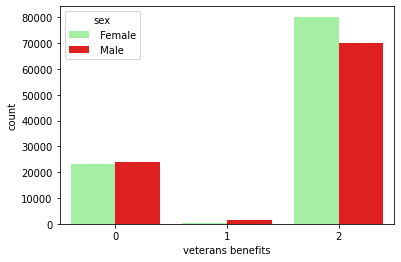

In [55]:
sns.countplot(x="veterans benefits", hue="sex", data=census_income,
              palette={" Female": "palegreen", " Male": "red"})

print(census_income['veterans benefits'].value_counts())

This plot shows which sex gets which type of veteran benefit. Sadly the data-set does not describe what the benefits mean. The first benefit 0 get more males than females, same with the second, but the third benefit is given to more females than males. There is also a large difference in the amount of the benefits. The first benefit is given to about 47409 people, whereas the second is 1984. The third benefit is much larger than the others with about 150130 people receiving the benefit.

### Education and gender

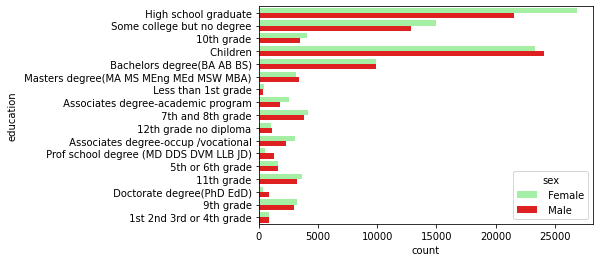

In [54]:
sns.countplot(y="education", hue="sex", data=census_income,
              palette={" Female": "palegreen", " Male": "red"})

The plot compares education for men and women. Fewer men than women have a high-school graduation as the highest graduation. For the education *Some college but no degree* more women have this as the highest graduation. In almost every category women have a slight advantage. Bachelor degrees are about equal between the two sexes. But in the higher education degrees men are more prominent. More males have a *masters degree* and more males have a -doctorate degree* then women in the year this data was gathered.

Maybe some difference can be explained by having more women than men in the US. For the higher education degrees it would be interesting which topic was studied. Maybe that are some colleges with technical subjects, where women are not very present at the time the data was gathered. There males dominated the technical/mathematical universities.